# Final Proyect Visualization of Data for Decision Making

Data: Passenger data from Titanic.

Variables:
* Sex: Qualitative Nominal. Gender of passenger. 
* Age: Quantitative Continuous. Age of passenger.
* Siblings: Quantitative Discrete. Number of siblings. 
* Parents/children aboard: Quantitative Discrete. Number of parents/children aboard.
* Fare paid: Quantitative Continuous. Fare paid to board the ship.
* Port of embarkation: Qualitative Nominal. Port where the passenger embarked.
* Ticket class: Qualitative Ordinal. Class on ticket.
* Category: Qualitative Nominal. Category of women, men or children.
* Alone or not: Qualitative Ordinal. Was traveling alone or not.
* Survived or not: Quantitative Discrete. Survived the sinking of the Titanic or not.


In [1]:
import pandas as pd
import numpy as np

In [2]:
pip install seaborn

     |████████████████████████████████| 292 kB 8.5 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install statsmodels

     |████████████████████████████████| 9.8 MB 1.7 MB/s            
     |████████████████████████████████| 233 kB 32.9 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [21]:
import statsmodels.api as sm

In [22]:
pip install sklearn

  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 24.8 MB 7.5 MB/s            
     |████████████████████████████████| 306 kB 51.2 MB/s            
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=42af753811b968ba481a4f12ce868f3632bbaeef4d1212cc9063af7559510b5a
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [23]:
from sklearn import linear_model

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
df = pd.read_csv("Titanic.csv") #Abrir csv
df.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


In [6]:
df.rename(columns = {'sex' : 'Sex',
                     'age' : 'Age',
                     'sibsp' : 'Siblings','parch' : 'Parents/Children','fare' : 'Fare','embarked' : 'Embarked','class' : 'Class','who' : 'Category', 'alone' : 'Alone', 'survived' : 'Survived'},
          inplace = True)
df.head()

,Sex,Age,Siblings,Parents/Children,Fare,Embarked,Class,Category,Alone,Survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


# What type of passenger is more likely to survive the Titanic sinking?

In [7]:
#Question 1
question1 = pd.pivot_table(df,  
                           index=['Class'],
                           values ="Survived",
                           columns='Category',
                          aggfunc="mean"
                          )
question1

Category,child,man,woman
Class,,,
First,0.833333,0.352941,0.978022
Second,1.000000,0.080808,0.909091
Third,0.431034,0.119122,0.491228


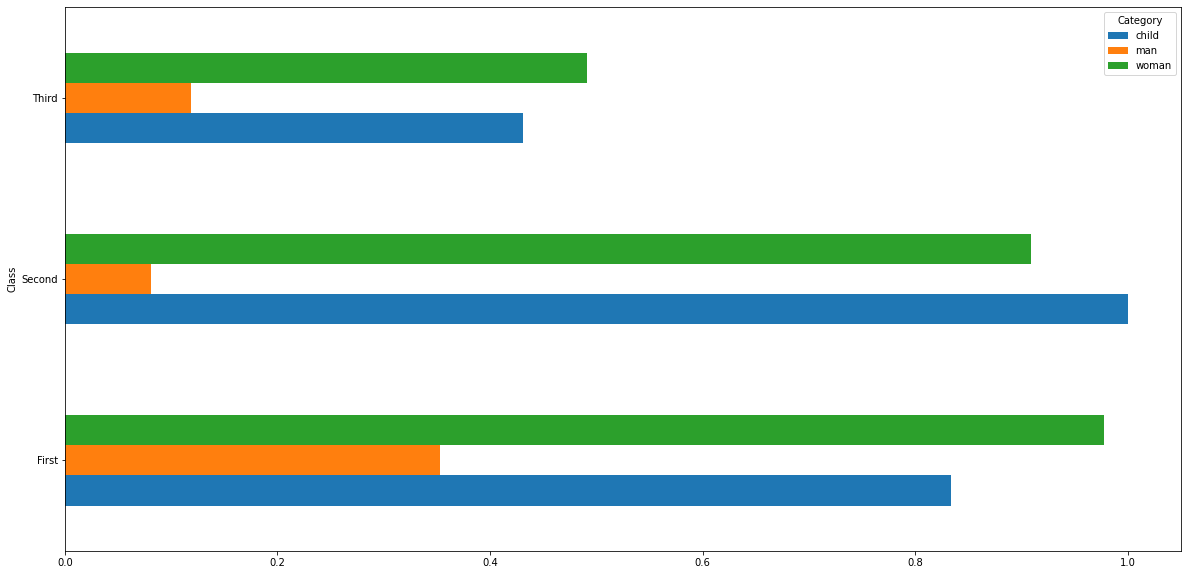

In [8]:
question1.plot.barh(figsize=(20,10))

 
* First class women and second class children had the highest survival rates.
* Men from second class were less likely to survive than men from third class.
* Children from first and third class were less likely to survive than the women from the respective class.


# What is the average fare paid per class and gender?

In [9]:
#Question 2
question2 = pd.pivot_table(df,
               index = "Class",
                values = "Fare", 
               aggfunc = "mean",
                           columns='Sex',
              )
question2

Sex,female,male
Class,,
First,106.125798,67.226127
Second,21.970121,19.741782
Third,16.118810,12.661633


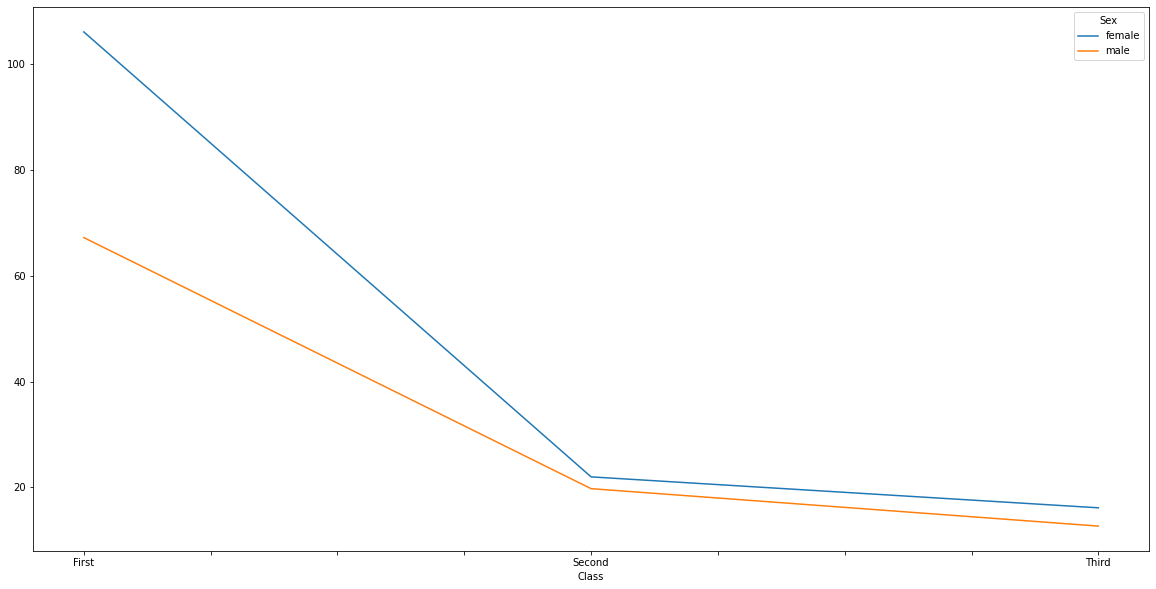

In [10]:
question2.plot(figsize=(20,10))


* Women paid more for their tickets than men.
* First class paid more than second class and second class more than third.


# How many passengers boarded the Titanic at each port? (In %)

In [11]:
counts = df['Embarked'].value_counts()

In [12]:
type (counts)
counts = counts.to_frame()
type (counts)

pandas.core.frame.DataFrame

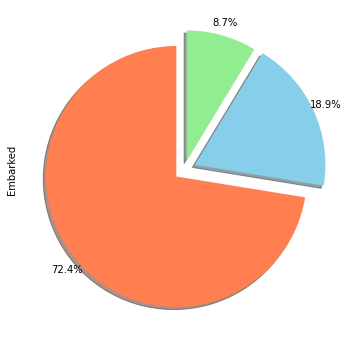

In [13]:
#Question 3
x = list(counts ['Embarked'])

explode_list = [0.08,0.09,0.07]
color_list = ['coral','skyblue','lightgreen']
counts['Embarked'].plot(kind='pie',
                  figsize = (15,6),
                  autopct='%1.1f%%',
                  startangle = 90,
                  shadow = True,
                   labels = None,
                   explode = explode_list,
                   colors = color_list,
                  pctdistance = 1.1)

* 72% of passengers boarded in Southampton, 18.9% in Cherbourg and 8.7% in Queenstown.
* More passengers boarded in Southampton than in any other port.


# How does traveling alone affect passenger survival rates?

In [14]:
#Question 4
question4 = pd.pivot_table(df,  
                           index=['Alone'],
                           values ="Survived",
                          aggfunc="mean"
                          )
question4

,Survived
Alone,
False,0.505650
True,0.303538


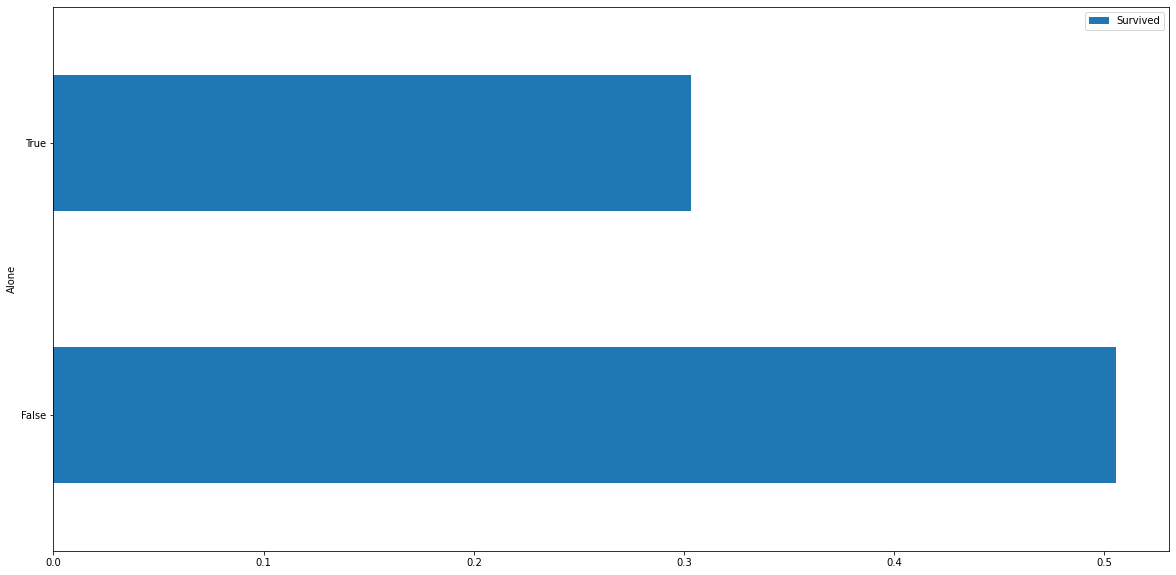

In [15]:
question4.plot.barh(figsize=(20,10))

* A passenger is more likely to survive the sinking of the Titanic if he/she is not traveling alone.


# What were the most common ages among the passengers?

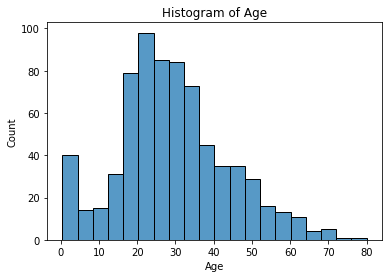

In [16]:
#Question 5
sns.histplot(x = df['Age']
           ).set_title('Histogram of Age')

plt.show()

* The passengers most frequent ages ranged from around 15 years old to 35 years old. 
* There is a peak in ages from 0 to around 5 years old which would be the children that were passengers in the ship.


# Does age have any atypical data?

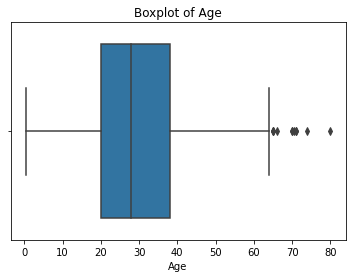

In [17]:
#Question 6
sns.boxplot(x = df['Age'],     
           ).set_title('Boxplot of Age')
plt.show()

* This boxplot graph shows that the median age of the passengers was around 28 years old. 
* Atypical data is shown because of the old aged passengers. Even though this data is shown as atypical, it still must be considered in any study done because it is real and correct data.


# Do older people have a better class?

In [43]:
#question 7
question7 = pd.pivot_table(df,
               index = "Class",
                values = "Age", 
               aggfunc = "mean",
              )
question7

,Age
Class,
First,38.105543
Second,29.877630
Third,25.140620


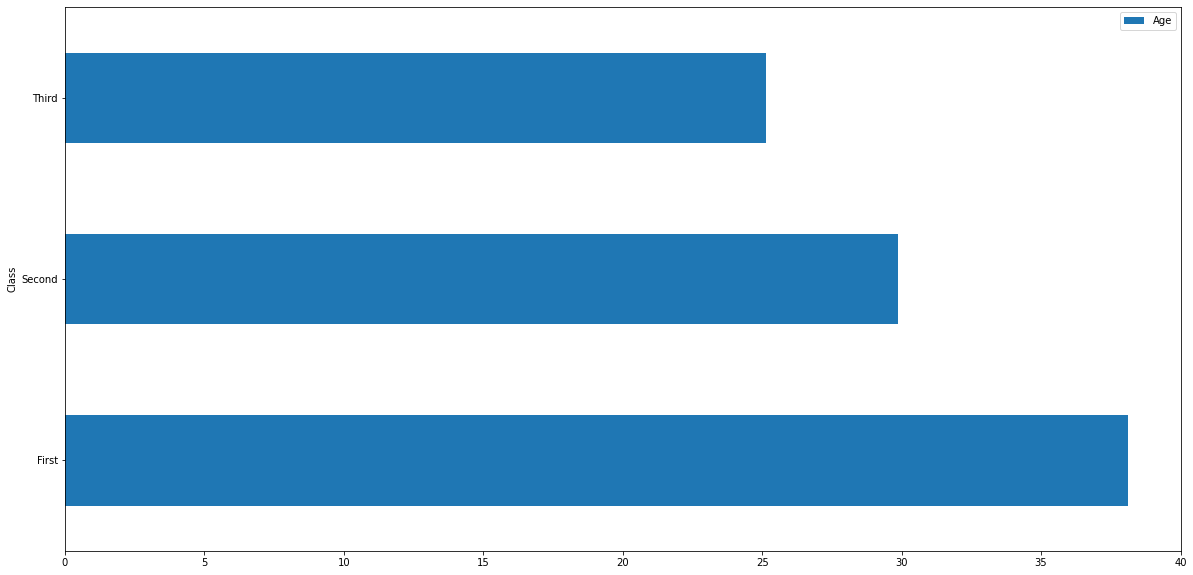

In [47]:
question7.plot.barh(figsize=(20,10))

* Older passengers are more likely to have boarded the ship in a better class than younger passengers.


# Is there any relationship between age and fare paid?

In [64]:
df.corr()

,Age,Siblings,Parents/Children,Fare,Alone,Survived
Age,1.000000,-0.307351,-0.187896,0.093143,0.195766,-0.082446
Siblings,-0.307351,1.000000,0.383338,0.139860,-0.629408,-0.015523
Parents/Children,-0.187896,0.383338,1.000000,0.206624,-0.577109,0.095265
Fare,0.093143,0.139860,0.206624,1.000000,-0.262799,0.266100
Alone,0.195766,-0.629408,-0.577109,-0.262799,1.000000,-0.199741
Survived,-0.082446,-0.015523,0.095265,0.266100,-0.199741,1.000000


In [18]:
df.dropna(inplace=True)
#df

In [24]:
y = pd.DataFrame(df['Fare'])
x = pd.DataFrame(df['Age'])

lm=linear_model.LinearRegression()
model_lm = lm.fit(x,y)
model_lm

LinearRegression()

In [25]:
modelTitanic = sm.OLS.from_formula('Fare~Age', data =df)
resultTitanic = modelTitanic.fit()
resultTitanic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Fare   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     6.214
Date:                Thu, 17 Mar 2022   Prob (F-statistic):             0.0129
Time:                        02:41:30   Log-Likelihood:                -3832.7
No. Observations:                 712   AIC:                             7669.
Df Residuals:                     710   BIC:                             7679.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.4823      4.503      5.437      0.000      15.642      33.323
Age            0.3402      0.136      2.493      0.013       0.072       0.608
==============================================================================
Omnibus:                      715.959   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30912.718
Skew:                           4.664   Prob(JB):                         0.00
Kurtosis:                      33.903   Cond. No.                         75.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
print('The y intercept, b0 = ', model_lm.intercept_)
print('The coeff. of Age, b1 = ', model_lm.coef_)
print('The R^2 values is = ', model_lm.score(x,y))

The y intercept, b0 =  [24.4823095]
The coeff. of Age, b1 =  [[0.34022368]]
The R^2 values is =  0.008675528639655372


In [52]:
# fare = b0+b1*age
# fare of a person age =20
# fare = 24.4823095 + 0.34022368 * 20

fare = 24.4823095 + 0.34022368 * 20
print('Predicted fare of a person with age 20 is: $', fare)

Predicted fare of a person with age 20 is: $ 31.2867831


In [53]:
# fare = b0+b1*age
# fare of a person age =80
# fare = 24.4823095 + 0.34022368 * 80

fare = 24.4823095 + 0.34022368 * 80
print('Predicted fare of a person with age 80 is: $', fare)

Predicted fare of a person with age 80 is: $ 51.7002039


In [55]:
RESI = resultTitanic.resid
RESI

0     -24.717230
1      33.872491
2     -25.403125
3      16.709862
4     -28.340138
         ...    
885    -8.626033
886   -20.668349
887    -0.946559
889    -3.328125
890   -27.619467
Length: 712, dtype: float64

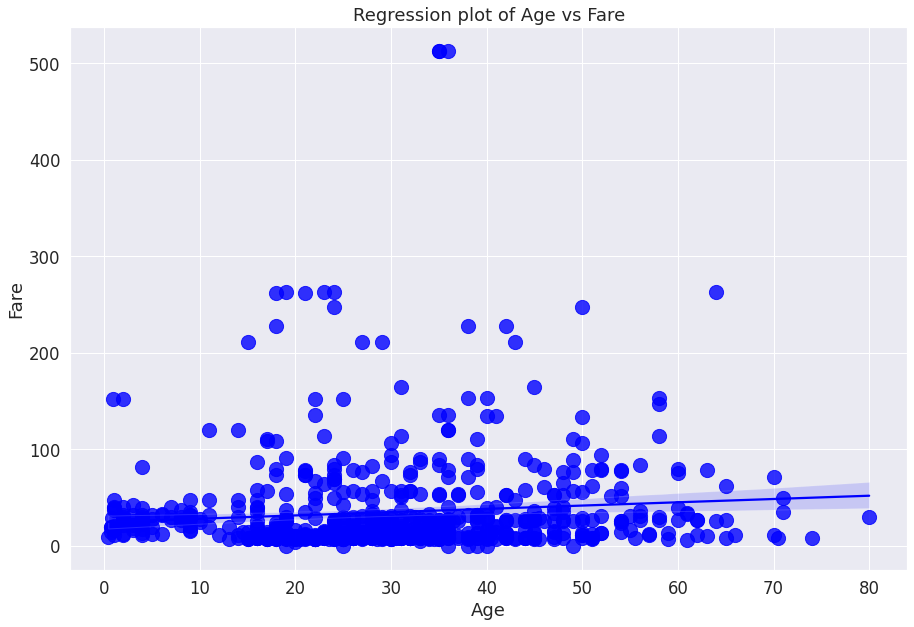

In [58]:
plt.figure(figsize = (15,10))
sns.set(font_scale = 1.5)
ax = sns.regplot(x = 'Age',
                 y = 'Fare',
                 data = df,
                 color = 'blue',
                 marker = 'o',
                 scatter_kws = {'s':200}
                )
ax.set(xlabel = 'Age',
       ylabel = 'Fare')


ax.set_title('Regression plot of Age vs Fare')
plt.show()

* There is no relevant relationship between age and fare. After analysing the regression plot and model, I came to the conclusion that it may be due to the fare changing drastically depending on the class of the passenger. For example, children in first class pay high fare prices and are young.
